# Homework 1: Language models (50 points)

The first homework focuses on the following skills: being able to work with simple formal exercises on language modeling, on understanding and being able to extract properties and configurations of state-of-the-art language models and, finally, training language models yourself!

### Logistics

* submission deadline: May 15th 23:59 German time via Moodle
  * please upload a **SINGLE ZIP FILE named Surname_FirstName_HW1.zip** containing the .ipynb file of the notebook (if you solve it on Colab, you can go to File > download), the json file for Ex. 2 and a .png or .jpg file with your losses plot from Ex. 3.
* please solve and submit the homework **individually**! 
* if you use Colab, to speed up the execution of the code on Colab (especially Exercise 3), you can use the available GPU (if Colab resources allow). For that, before executing your code, navigate to Runtime > Change runtime type > GPU > Save.

## Exercise 1: Understanding language modeling (12 points)

Please answer the following exercises. Importantly, please reason step by step; i.e., where calculations are required, please provide intermediate steps of how you arrived at your solution. You do not need to write any code, just mathematical solutions.

> 1. [6pts] Consider the corpus $C$ with the following sentences: $C=${"The cat sleeps", "The mouse sings", "The cat sleeps", "A dog sings"}. 
> (a) Define the vocabulary $V$ of this corpus (assuming by-word tokenization).
> (b) Pick one of the four sentences in $C$. Formulate the probability of that sentence in the form of the chain rule. Calculate the probability of each termn in the chain rule, given the corpus.
> 2. [4pts] We want to train a neural network that takes as input two numbers $x_1, x_2$, passes them through three hidden linear layers, each with 13 neurons, each followed by the ReLU activation function, and outputs three numbers $y_1, y_2, y_3$. Write down all weight matrices of this network with their dimensions. (Example: if one weight matrix has the dimensions 3x5, write $M_1\in R^{3\times5}$) 
> 3. [2pts] Consider the sequence: "Input: Some students trained each language model". Assuming that each word+space/punctuation corresponds to one token, consider the following token probabilities of this sequence under some trained language model: $p = [0.67, 0.91, 0.83, 0.40, 0.29, 0.58, 0.75]$. Compute the average surprisal of this sequence under that language model. [Note: in this class we always assume the base $e$ for $log$, unless indicated otherwise. This is also usually the case throughout NLP.]

1.
- what is byword tokenization? V = {the, cat, sleeps, mouse, sings, a, dog}
- p(the cat sings) = p(the) * p(cat | the) * p(sings | the cat)
- single counts/frequencies = {the: 3, cat: 2, sleeps: 2, mouse: 1, sings: 2, a: 1, dog: 1}

2.
- 2 --> 13 --> 13 --> 13 --> 3

3.
- p(some | <bos>) = 0.67
- p(students | some) = 0.91
- p(trained | some students) = 0.83
- p(each | some students trained) = 0.40
- p(language | some students trained each) = 0.29
- p(model | some students trained each language) = 0.58
- p(<eos> | some students trained each language model) = 0.75

## Exercise 2: Extracting LLM fingerprints (15 points)

For this task, your job is to extract the "fingerprint" of a state-of-the-art large language model from the paper. Specifically, you job is to: 
* find the model that is assigned to your surname in the list **HW1_Model2Group_assignment.csv** (to be found on Moodle under topic 02). Please investigate the latest version of your model, unless the version is specified in the list.
* find out the following charactersitcs of your model 
* submit a json file with your responses in the following format (below is a partial example). 
 
Note that, of course, it might be that some information is not available or that some categories are not applicable. The idea is, that, as a course we can create a fun website which will show a somewhat comprehensive graphical comparison of current language models and their configurations. Based on your collective json files, the lecturers will set up a front end at some point during the class.

**IMPORTANT**: Please email the lecturers by the homework deadline if you DO NOT consent that your json file is used for this idea.

In [2]:
{
    "model_name": "GPT-35",
    "huggingface_model_id": "gpt35",
    "paper_url": "https://arxiv.org/abs/XXX",
    "tokenizer_type": "BPE",
    "vocabulary_size": "XXX",
    "architecture": "Mixture of transformer agents",
    "architecture_type": "decoder only",
    "architecture_quirks": [
        "sparse attention", 
        "...",
    ],
    "parameters": "XXX",
    "finetuning_type": "RLHF",
    "training_data_cutoff": "2050",
    "number_training_tokens": "XXX",
    "pretraining_data_size": "1GB",
    "finetuning_data_size": "XXX",
    "training_data": [
        "Books corpus",
        "Twitter",
        "..."
    ],
    "finetuning_data": [
        "XXX",
        "XXX",
        "..."
    ],
    "access": "open",
    "summary": "A few sentences of what the model claims to be their unique selling point / main contribution"
}

{'model_name': 'GPT-35',
 'huggingface_model_id': 'gpt35',
 'paper_url': 'https://arxiv.org/abs/XXX',
 'tokenizer_type': 'BPE',
 'vocabulary_size': 'XXX',
 'architecture': 'Mixture of transformer agents',
 'architecture_type': 'decoder only',
 'architecture_quirks': ['sparse attention', '...'],
 'parameters': 'XXX',
 'finetuning_type': 'RLHF',
 'training_data_cutoff': '2050',
 'number_training_tokens': 'XXX',
 'pretraining_data_size': '1GB',
 'finetuning_data_size': 'XXX',
 'training_data': ['Books corpus', 'Twitter', '...'],
 'finetuning_data': ['XXX', 'XXX', '...'],
 'access': 'open',
 'summary': 'A few sentences of what the model claims to be their unique selling point / main contribution'}

## Exercise 3: Fine-tuning GPT-2 for QA (23 points)

The learning goal of this exercise is to practice fine-tuning a pretrained LM, GPT-2 small, for a particular task, namely commonsense question answering (QA). We will use a task-specific dataset, [CommonsenseQA](https://huggingface.co/datasets/tau/commonsense_qa), that was introduced by [Talmor et al. (2018)](https://arxiv.org/abs/1811.00937). We will evaluate the performance of the model on our test split of the dataset over training to monitor whether the model's performance is improving and compare the performance of the base pretrained GPT-2 and the fine-tuned model. We will need to perform the following steps: 

1. Prepare data according to steps described in [sheet 1.1](https://cogsciprag.github.io/Understanding-LLMs-course/tutorials/01-introduction.html#main-training-data-processing-steps)
   1. additionally to these steps, prepare a custom Dataset (like in [sheet 2.3](https://cogsciprag.github.io/Understanding-LLMs-course/tutorials/02c-MLP-pytorch.html#preparing-the-training-data)) that massages the dataset from the format that it is shipped in on HuggingFace into strings that can be used for training. Some of the procesing steps will happen in the Dataset.
2. Load the pretrained GPT-2 model
3. Set up training pipeline according to steps described in [sheet 2.5]()
4. Run the training while tracking the losses
5. Save plot of losses for submission

Your tasks:
> 1. [19pts] Complete the code in the spots where there is a comment "#### YOUR CODE HERE ####". There are instructions in the comments as to what the code should implement. With you completed code, you should be able to let the training run without errors. Note that the point of the exercise is the implementation; we should not necessarily expect great performance of the fine-tuned model (and the actual performance will *not* be graded). Often there are several correct ways of implementing something. Anything that is correct will be accepted.
> 2. [4pts] Answer questions at the end of the execise.

In [1]:
# note: if you are on Colab, you might need to install some requirements
# as we did in Sheet 1.1. Otherwise, don't forget to activate your local environment

from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2Tokenizer, GPT2LMHeadModel
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

/Users/swagatam/miniconda3/envs/ullm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# additioanlly, we need to install accelerate
# uncomment and run the following line on Colab or in your environment
# !pip install accelerate
# NOTE: in a notebook, reloading of the kernel might be required after installation if you get dependency errors with the transformers package

In [3]:
### 1. Prepare data with data prepping steps from sheet 1.1

# a. Acquiring data
# b. (minimally) exploring dataset
# c. cleaning / wrangling data (combines step 4 from sheet 1.1 and step 1.1 above)
# d. splitting data into training and test set (we will not do any hyperparam tuning) 
# (we don't need further training set wrangling)
# e. tokenizing data and making sure it can be batched (i.e., conversted into 2d tensors)
# this will also happen in our custom Dataset class (common practice when working with text data)

In [4]:
# downaload dataset from HF
dataset = load_dataset("tau/commonsense_qa")

In [5]:
# inspect dataset
print(dataset.keys())
# print a sample from the dataset
### YOUR CODE HERE ####
dataset['train'][0], dataset['validation'][0], dataset['test'][0]

dict_keys(['train', 'validation', 'test'])


({'id': '075e483d21c29a511267ef62bedc0461',
  'question': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change?',
  'question_concept': 'punishing',
  'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
   'text': ['ignore', 'enforce', 'authoritarian', 'yell at', 'avoid']},
  'answerKey': 'A'},
 {'id': '1afa02df02c908a558b4036e80242fac',
  'question': 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what?',
  'question_concept': 'revolving door',
  'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
   'text': ['bank', 'library', 'department store', 'mall', 'new york']},
  'answerKey': 'A'},
 {'id': '90b30172e645ff91f7171a048582eb8b',
  'question': 'The townhouse was a hard sell for the realtor, it was right next to a high rise what?',
  'question_concept': 'townhouse',
  'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
   'text': ['suburban development',
    'apartment b

Note that the test split does not have ground truth answer labels. Therefore, **we will use the validation split as our test split**.

In [6]:
# load tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
# set padding side to be left because we are doing causal LM
tokenizer.padding_side = "left"

In [7]:
def massage_input_text(example):
    """
    Helper for converting input examples which have 
    a separate qquestion, labels, answer options
    into a single string.

    Arguments
    ---------
    example: dict
        Sample input from the dataset which contains the 
        question, answer labels (e.g. A, B, C, D),
        the answer options for the question, and which 
        of the answers is correct.
    
    Returns
    -------
    input_text: str
        Formatted training text which contains the question,
        the forwatted answer options (e.g., 'A. <option 1> B. <option 2>' etc)
        and the ground truth answer.
    """
    # combine each label with its corresponding text
    answer_options_list = list(zip(
        example["choices"]["label"],
        example["choices"]["text"]
    ))
    # join each label and text with . and space
    answer_options = ['. '.join(y) for y in answer_options_list] ### YOUR CODE HERE ####
    # join the list of options with spaces into single string
    answer_options_string = ' '.join(answer_options) ### YOUR CODE HERE ####
    # combine question and answer options
    input_text = example["question"] + " " + answer_options_string
    # append the true answer with a new line, "Answer: " and the label
    input_text += "\nAnswer: " + example["answerKey"]

    return input_text

# process input texts of train and test sets
massaged_datasets = dataset.map(
    lambda example: {
        "text": massage_input_text(example)
    }
)


In [8]:
# inspect a sample from our preprocessed data
massaged_datasets["train"][0]

{'id': '075e483d21c29a511267ef62bedc0461',
 'question': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change?',
 'question_concept': 'punishing',
 'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
  'text': ['ignore', 'enforce', 'authoritarian', 'yell at', 'avoid']},
 'answerKey': 'A',
 'text': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change? A. ignore B. enforce C. authoritarian D. yell at E. avoid\nAnswer: A'}

In [9]:
massaged_datasets["validation"][0], massaged_datasets["test"][0]

({'id': '1afa02df02c908a558b4036e80242fac',
  'question': 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what?',
  'question_concept': 'revolving door',
  'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
   'text': ['bank', 'library', 'department store', 'mall', 'new york']},
  'answerKey': 'A',
  'text': 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york\nAnswer: A'},
 {'id': '90b30172e645ff91f7171a048582eb8b',
  'question': 'The townhouse was a hard sell for the realtor, it was right next to a high rise what?',
  'question_concept': 'townhouse',
  'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
   'text': ['suburban development',
    'apartment building',
    'bus stop',
    'michigan',
    'suburbs']},
  'answerKey': '',
  'text': 'The townhouse was a hard sell for the realtor, it was right next to a high rise w

In [10]:
class CommonsenseQADataset(Dataset):
    """
    Custom dataset class for CommonsenseQA dataset.
    """

    def __init__(
            self, 
            train_split, 
            test_split,
            tokenizer,
            max_length=64,
            dataset_split="train",
        ) -> None:
        """
        Initialize the dataset object.
        
        Arguments
        ---------
        train_split: dict
            Training data dictionary with different columns.
        test_split: dict
            Test data dictionary with different columns.
        tokenizer: Tokenizer
            Initialized tokenizer for processing samples.
        max_length: int
            Maximal length of inputs. All inputs will be 
            truncated or padded to this length.
        dataset_split: str
            Specifies which split of the dataset to use. 
            Default is "train".
        """
        self.train_split = train_split['text']
        self.test_split = test_split['text']
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.dataset_split = dataset_split

    def __len__(self):
        """
        Method returning the length of the training dataset.
        """
        
        if self.dataset_split == "train":
            return len(self.train_split) ### YOUR CODE HERE ####
        return len(self.test_split)
    
    def __getitem__(self, idx):
        """
        Method returning a single training example.
        Note that it also tokenizes, truncates or pads the input text.
        Further, it creates a mask tensor for the input text which 
        is used for causal masking in the transformer model.

        Arguments
        ---------
        idx: int
            Index of training sample to be retrieved from the data.
        
        Returns
        --------
        tokenized_input: dict
            Dictionary with input_ids (torch.Tensor) and an attention_mask
            (torch.Tensor).
        """
        # retrieve a training sample at the specified index idx
        # HINT: note that this might depend on self.dataset_split
        if self.dataset_split == "train":
            input_text = self.train_split[idx]
        elif self.dataset_split == "test":
            input_text = self.test_split[idx] ### YOUR CODE HERE ####
        
        tokenized_input = self.tokenizer(
            input_text,
            max_length=self.max_length, ### YOUR CODE HERE ####
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        tokenized_input["attention_mask"] = (tokenized_input["input_ids"] != tokenizer.pad_token_id).long()
        return tokenized_input

In [11]:
# move to accelerated device 
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Device: {device}")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Device: {device}")
else:
    device = torch.device("cpu")
    print(f"Device: {device}")


Device: mps


In [12]:
# 2. init model

# load pretrained gpt2 for HF
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device) ### YOUR CODE HERE ####
# print num of trainable parameters
model_size = sum(t.numel() for t in model.parameters())
print(f"GPT-2 size: {model_size/1000**2:.1f}M parameters")

GPT-2 size: 124.4M parameters


Hint: If you run out of memory while trying to run the training, try decreasing the batch size.

In [13]:
# 3. set up configurations required for the training loop

# instantiate dataset with the downloaded commonsense_qa data 
train_dataset = CommonsenseQADataset(
    ### YOUR CODE HERE ####
    massaged_datasets["train"],
    massaged_datasets["validation"],
    tokenizer,
)
# instantiate test dataset with the downloaded commonsense_qa data
test_dataset = CommonsenseQADataset(
    ### YOUR CODE HERE ####,
    massaged_datasets["train"],
    massaged_datasets["validation"],
    tokenizer,
    dataset_split="test"
)
# create a DataLoader for the dataset
# the data loader will automatically batch the data
# and iteratively return training examples (question answer pairs) in batches
dataloader = DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=True
)
# create a DataLoader for the test dataset
# reason for separate data loader is that we want to
# be able to use a different index for retreiving the test batches
# we might also want to use a different batch size etc.
test_dataloader = DataLoader(
    test_dataset, 
    batch_size=32, 
    shuffle=True
)

In [14]:
batch = next(iter(test_dataloader))
batch.keys(), batch['input_ids'].shape, batch['attention_mask'].shape

(dict_keys(['input_ids', 'attention_mask']),
 torch.Size([32, 1, 64]),
 torch.Size([32, 1, 64]))

In [15]:
inputs = batch['input_ids'].squeeze(1)
inputs.shape

torch.Size([32, 64])

In [16]:
tokenizer.decode(inputs[:, -1])

' C B C D A C C C A D A A A D D D D D B A B C D C A B D A A D C E'

In [17]:
logits[:, -2, :].shape

NameError: name 'logits' is not defined

In [20]:
# 4. run the training of the model
# Hint: for implementing the forward pass and loss computation, carefully look at the exercise sheets 
# and the links to examples in HF tutorials.

# put the model in training mode
model.train()
# move the model to the device (e.g. GPU)
model = model.to(device)

# trianing configutations 
# feel free to play around with these
epochs  = 5
train_steps =  len(train_dataset) // 32
print("Number of training steps: ", train_steps)
# number of test steps to perform every 10 training steps
# (smaller that the entore test split for reasons of comp. time)
num_test_steps = len(test_dataset) // 32 # 5

# define optimizer and learning rate
optimizer = torch.optim.AdamW(model.parameters(),
                              lr=1e-4,
                              # lr=5e-4  # given
                             ) 
# define some variables to accumulate the losses
losses = []
test_losses = []

# iterate over epochs
for e in range(epochs):
    # iterate over training steps
    for i in tqdm(range(train_steps)):
        # get a batch of data
        x = next(iter(dataloader))
        # move the data to the device (GPU)
        x = x.to(device) ### YOUR CODE HERE ####
        
        # forward pass through the model
        ### YOUR CODE HERE ###
        x['input_ids'] = x['input_ids'].squeeze(1)
        x['attention_mask'] = x['attention_mask'].squeeze(1)
        outputs = model(
            ### YOUR CODE HERE ####
            **x
        )
        # get the loss
        logits = outputs.logits
        targets = x['input_ids']
        # print(logits.shape, targets.shape)
        B, T, C = logits.shape
        loss = torch.nn.CrossEntropyLoss()(logits[:, -2, :], targets[:, -1]) ### YOUR CODE HERE ####
        # backward pass
        ### YOUR CODE HERE ####
        loss.backward()
        losses.append(loss.item())
        # update the parameters of the model
        ### YOUR CODE HERE ###
        optimizer.step()

        # zero out gradient for next step
        optimizer.zero_grad()
        ### YOUR CODE HERE ####

        # evaluate on test set every 10 steps
        if i % 10 == 0:
            print(f"Epoch {e}, step {i}, loss {loss.item()}")
            # track test loss for the evaluation iteration
            test_loss = 0
            for j in range(num_test_steps):
                # get test batch
                x_test = next(iter(test_dataloader))
                x_test = x_test.to(device)
                x_test['input_ids'] = x_test['input_ids'].squeeze(1)
                x_test['attention_mask'] = x_test['attention_mask'].squeeze(1)
                with torch.no_grad():
                    test_outputs = model(
                        ### YOUR CODE HERE ####
                        **x_test
                    )
                    logits = test_outputs.logits
                test_loss += torch.nn.CrossEntropyLoss()(logits[:, -2, :], x_test['input_ids'][:, -1]) ### YOUR CODE HERE ####
                
            test_losses.append(test_loss.item() / num_test_steps)
            print("Test loss: ", test_loss.item() / num_test_steps)

Number of training steps:  304


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 0, step 0, loss 9.681169509887695


  0%|▏                                          | 1/304 [00:07<37:52,  7.50s/it]

Test loss:  3.3782095658151725


  3%|█▍                                        | 10/304 [00:13<03:48,  1.29it/s]

Epoch 0, step 10, loss 4.315465927124023


  4%|█▌                                        | 11/304 [00:20<13:20,  2.73s/it]

Test loss:  4.074988114206414


  7%|██▊                                       | 20/304 [00:26<03:38,  1.30it/s]

Epoch 0, step 20, loss 3.69710636138916


  7%|██▉                                       | 21/304 [00:34<12:39,  2.68s/it]

Test loss:  3.657258284719367


 10%|████▏                                     | 30/304 [00:40<03:31,  1.30it/s]

Epoch 0, step 30, loss 3.0600316524505615


 10%|████▎                                     | 31/304 [00:47<12:12,  2.68s/it]

Test loss:  3.0416651274028577


 13%|█████▌                                    | 40/304 [00:53<03:23,  1.30it/s]

Epoch 0, step 40, loss 3.7761335372924805


 13%|█████▋                                    | 41/304 [01:00<11:46,  2.69s/it]

Test loss:  3.8556988364771794


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.30it/s]

Epoch 0, step 50, loss 6.795389175415039


 17%|███████                                   | 51/304 [01:13<11:18,  2.68s/it]

Test loss:  6.858035438939145


 20%|████████▎                                 | 60/304 [01:20<03:08,  1.30it/s]

Epoch 0, step 60, loss 6.394161224365234


 20%|████████▍                                 | 61/304 [01:27<10:51,  2.68s/it]

Test loss:  6.576283906635485


 23%|█████████▋                                | 70/304 [01:33<03:00,  1.30it/s]

Epoch 0, step 70, loss 3.4209647178649902


 23%|█████████▊                                | 71/304 [01:40<10:25,  2.68s/it]

Test loss:  2.7906367653294613


 26%|███████████                               | 80/304 [01:46<02:53,  1.29it/s]

Epoch 0, step 80, loss 3.366309642791748


 27%|███████████▏                              | 81/304 [01:53<10:04,  2.71s/it]

Test loss:  3.6321780556126644


 30%|████████████▍                             | 90/304 [02:00<02:48,  1.27it/s]

Epoch 0, step 90, loss 3.5619800090789795


 30%|████████████▌                             | 91/304 [02:07<09:38,  2.71s/it]

Test loss:  3.47096091822574


 33%|█████████████▍                           | 100/304 [02:13<02:35,  1.31it/s]

Epoch 0, step 100, loss 3.029909133911133


 33%|█████████████▌                           | 101/304 [02:20<09:11,  2.72s/it]

Test loss:  2.8722124601665295


 36%|██████████████▊                          | 110/304 [02:27<02:30,  1.29it/s]

Epoch 0, step 110, loss 3.356424331665039


 37%|██████████████▉                          | 111/304 [02:34<08:47,  2.73s/it]

Test loss:  2.3807043778268913


 39%|████████████████▏                        | 120/304 [02:40<02:22,  1.29it/s]

Epoch 0, step 120, loss 2.9088926315307617


 40%|████████████████▎                        | 121/304 [02:47<08:19,  2.73s/it]

Test loss:  2.046011473003187


 43%|█████████████████▌                       | 130/304 [02:53<02:12,  1.31it/s]

Epoch 0, step 130, loss 1.748059630393982


 43%|█████████████████▋                       | 131/304 [03:01<07:46,  2.70s/it]

Test loss:  1.9656753540039062


 46%|██████████████████▉                      | 140/304 [03:07<02:05,  1.30it/s]

Epoch 0, step 140, loss 1.913233995437622


 46%|███████████████████                      | 141/304 [03:14<07:17,  2.69s/it]

Test loss:  1.920197938617907


 49%|████████████████████▏                    | 150/304 [03:20<01:59,  1.29it/s]

Epoch 0, step 150, loss 1.7733821868896484


 50%|████████████████████▎                    | 151/304 [03:27<06:56,  2.72s/it]

Test loss:  1.8483186019094366


 53%|█████████████████████▌                   | 160/304 [03:34<01:50,  1.30it/s]

Epoch 0, step 160, loss 1.650742769241333


 53%|█████████████████████▋                   | 161/304 [03:41<06:27,  2.71s/it]

Test loss:  1.7648156818590666


 56%|██████████████████████▉                  | 170/304 [03:47<01:44,  1.29it/s]

Epoch 0, step 170, loss 1.8565847873687744


 56%|███████████████████████                  | 171/304 [03:54<05:57,  2.69s/it]

Test loss:  1.7632566753186678


 59%|████████████████████████▎                | 180/304 [04:00<01:36,  1.29it/s]

Epoch 0, step 180, loss 1.6725804805755615


 60%|████████████████████████▍                | 181/304 [04:08<05:30,  2.68s/it]

Test loss:  1.8384740729081004


 62%|█████████████████████████▋               | 190/304 [04:14<01:28,  1.29it/s]

Epoch 0, step 190, loss 1.712059736251831


 63%|█████████████████████████▊               | 191/304 [04:21<05:03,  2.68s/it]

Test loss:  1.7991702431126644


 66%|██████████████████████████▉              | 200/304 [04:27<01:20,  1.30it/s]

Epoch 0, step 200, loss 1.691483736038208


 66%|███████████████████████████              | 201/304 [04:34<04:36,  2.68s/it]

Test loss:  1.7572121871145148


 69%|████████████████████████████▎            | 210/304 [04:40<01:12,  1.30it/s]

Epoch 0, step 210, loss 1.7649285793304443


 69%|████████████████████████████▍            | 211/304 [04:47<04:09,  2.69s/it]

Test loss:  1.7807661357678866


 72%|█████████████████████████████▋           | 220/304 [04:54<01:05,  1.29it/s]

Epoch 0, step 220, loss 1.6543864011764526


 73%|█████████████████████████████▊           | 221/304 [05:01<03:42,  2.69s/it]

Test loss:  1.730079450105366


 76%|███████████████████████████████          | 230/304 [05:07<00:57,  1.30it/s]

Epoch 0, step 230, loss 1.7669905424118042


 76%|███████████████████████████████▏         | 231/304 [05:14<03:15,  2.68s/it]

Test loss:  1.7861621254368831


 79%|████████████████████████████████▎        | 240/304 [05:20<00:48,  1.31it/s]

Epoch 0, step 240, loss 1.7032885551452637


 79%|████████████████████████████████▌        | 241/304 [05:27<02:48,  2.68s/it]

Test loss:  1.7291962473016036


 82%|█████████████████████████████████▋       | 250/304 [05:33<00:41,  1.30it/s]

Epoch 0, step 250, loss 1.6878807544708252


 83%|█████████████████████████████████▊       | 251/304 [05:41<02:22,  2.68s/it]

Test loss:  1.6997793097245066


 86%|███████████████████████████████████      | 260/304 [05:47<00:34,  1.29it/s]

Epoch 0, step 260, loss 1.6875584125518799


 86%|███████████████████████████████████▏     | 261/304 [05:54<01:55,  2.68s/it]

Test loss:  1.7525584572239925


 89%|████████████████████████████████████▍    | 270/304 [06:00<00:26,  1.29it/s]

Epoch 0, step 270, loss 2.7401866912841797


 89%|████████████████████████████████████▌    | 271/304 [06:07<01:28,  2.69s/it]

Test loss:  1.6846988075657894


 92%|█████████████████████████████████████▊   | 280/304 [06:14<00:18,  1.29it/s]

Epoch 0, step 280, loss 1.6299474239349365


 92%|█████████████████████████████████████▉   | 281/304 [06:21<01:01,  2.68s/it]

Test loss:  1.7064554314864309


 95%|███████████████████████████████████████  | 290/304 [06:27<00:10,  1.29it/s]

Epoch 0, step 290, loss 1.6804018020629883


 96%|███████████████████████████████████████▏ | 291/304 [06:34<00:34,  2.68s/it]

Test loss:  1.688831931666324


 99%|████████████████████████████████████████▍| 300/304 [06:40<00:03,  1.29it/s]

Epoch 0, step 300, loss 1.672749638557434


 99%|████████████████████████████████████████▌| 301/304 [06:47<00:08,  2.68s/it]

Test loss:  1.7489708348324424


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 1, step 0, loss 1.663527250289917


  0%|▏                                          | 1/304 [00:07<36:03,  7.14s/it]

Test loss:  1.7754671197188527


  3%|█▍                                        | 10/304 [00:13<03:41,  1.33it/s]

Epoch 1, step 10, loss 1.7192800045013428


  4%|█▌                                        | 11/304 [00:20<13:13,  2.71s/it]

Test loss:  1.7064285278320312


  7%|██▊                                       | 20/304 [00:26<03:39,  1.30it/s]

Epoch 1, step 20, loss 1.6779670715332031


  7%|██▉                                       | 21/304 [00:33<12:39,  2.68s/it]

Test loss:  1.7197586862664473


 10%|████▏                                     | 30/304 [00:39<03:31,  1.29it/s]

Epoch 1, step 30, loss 1.6180477142333984


 10%|████▎                                     | 31/304 [00:46<12:12,  2.68s/it]

Test loss:  1.7198775442023027


 13%|█████▌                                    | 40/304 [00:53<03:23,  1.29it/s]

Epoch 1, step 40, loss 1.679885983467102


 13%|█████▋                                    | 41/304 [01:00<11:45,  2.68s/it]

Test loss:  1.7219081677888568


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.29it/s]

Epoch 1, step 50, loss 2.0401525497436523


 17%|███████                                   | 51/304 [01:13<11:18,  2.68s/it]

Test loss:  1.7198956138209294


 20%|████████▎                                 | 60/304 [01:19<03:08,  1.30it/s]

Epoch 1, step 60, loss 1.6397578716278076


 20%|████████▍                                 | 61/304 [01:26<10:52,  2.69s/it]

Test loss:  1.7095226488615338


 23%|█████████▋                                | 70/304 [01:32<03:00,  1.29it/s]

Epoch 1, step 70, loss 1.7074940204620361


 23%|█████████▊                                | 71/304 [01:40<10:24,  2.68s/it]

Test loss:  1.7275234021638568


 26%|███████████                               | 80/304 [01:46<02:50,  1.31it/s]

Epoch 1, step 80, loss 2.3503408432006836


 27%|███████████▏                              | 81/304 [01:53<09:51,  2.65s/it]

Test loss:  1.7318998637952303


 30%|████████████▍                             | 90/304 [01:59<02:45,  1.30it/s]

Epoch 1, step 90, loss 1.703898310661316


 30%|████████████▌                             | 91/304 [02:06<09:31,  2.68s/it]

Test loss:  1.709625244140625


 33%|█████████████▍                           | 100/304 [02:12<02:37,  1.30it/s]

Epoch 1, step 100, loss 1.9852774143218994


 33%|█████████████▌                           | 101/304 [02:19<09:04,  2.68s/it]

Test loss:  1.731262809351871


 36%|██████████████▊                          | 110/304 [02:26<02:29,  1.29it/s]

Epoch 1, step 110, loss 1.6509478092193604


 37%|██████████████▉                          | 111/304 [02:33<08:37,  2.68s/it]

Test loss:  1.732221703780325


 39%|████████████████▏                        | 120/304 [02:39<02:23,  1.29it/s]

Epoch 1, step 120, loss 1.6328171491622925


 40%|████████████████▎                        | 121/304 [02:46<08:11,  2.69s/it]

Test loss:  1.6824664065712376


 43%|█████████████████▌                       | 130/304 [02:52<02:14,  1.30it/s]

Epoch 1, step 130, loss 2.118147850036621


 43%|█████████████████▋                       | 131/304 [02:59<07:44,  2.68s/it]

Test loss:  1.790002521715666


 46%|██████████████████▉                      | 140/304 [03:05<02:03,  1.32it/s]

Epoch 1, step 140, loss 1.6943782567977905


 46%|███████████████████                      | 141/304 [03:12<07:15,  2.67s/it]

Test loss:  1.702313272576583


 49%|████████████████████▏                    | 150/304 [03:19<01:58,  1.29it/s]

Epoch 1, step 150, loss 1.6331324577331543


 50%|████████████████████▎                    | 151/304 [03:26<06:50,  2.68s/it]

Test loss:  1.7097420943410773


 53%|█████████████████████▌                   | 160/304 [03:32<01:51,  1.29it/s]

Epoch 1, step 160, loss 1.9049129486083984


 53%|█████████████████████▋                   | 161/304 [03:39<06:24,  2.69s/it]

Test loss:  1.7216772782175165


 56%|██████████████████████▉                  | 170/304 [03:45<01:43,  1.30it/s]

Epoch 1, step 170, loss 1.6267576217651367


 56%|███████████████████████                  | 171/304 [03:52<05:56,  2.68s/it]

Test loss:  1.7569513822856702


 59%|████████████████████████▎                | 180/304 [03:59<01:35,  1.29it/s]

Epoch 1, step 180, loss 1.6800248622894287


 60%|████████████████████████▍                | 181/304 [04:06<05:29,  2.68s/it]

Test loss:  1.6939295718544407


 62%|█████████████████████████▋               | 190/304 [04:12<01:27,  1.30it/s]

Epoch 1, step 190, loss 1.6999566555023193


 63%|█████████████████████████▊               | 191/304 [04:19<05:03,  2.68s/it]

Test loss:  1.8000761333264803


 66%|██████████████████████████▉              | 200/304 [04:25<01:20,  1.29it/s]

Epoch 1, step 200, loss 1.6887216567993164


 66%|███████████████████████████              | 201/304 [04:32<04:37,  2.69s/it]

Test loss:  1.7598439266807155


 69%|████████████████████████████▎            | 210/304 [04:38<01:11,  1.32it/s]

Epoch 1, step 210, loss 1.8613730669021606


 69%|████████████████████████████▍            | 211/304 [04:45<04:06,  2.65s/it]

Test loss:  1.751067512913754


 72%|█████████████████████████████▋           | 220/304 [04:52<01:04,  1.30it/s]

Epoch 1, step 220, loss 1.7692999839782715


 73%|█████████████████████████████▊           | 221/304 [04:59<03:42,  2.68s/it]

Test loss:  1.7780721564041941


 76%|███████████████████████████████          | 230/304 [05:05<00:57,  1.29it/s]

Epoch 1, step 230, loss 1.6412947177886963


 76%|███████████████████████████████▏         | 231/304 [05:12<03:15,  2.68s/it]

Test loss:  1.7414697345934416


 79%|████████████████████████████████▎        | 240/304 [05:18<00:49,  1.30it/s]

Epoch 1, step 240, loss 1.6053141355514526


 79%|████████████████████████████████▌        | 241/304 [05:25<02:48,  2.68s/it]

Test loss:  1.734956239399157


 82%|█████████████████████████████████▋       | 250/304 [05:32<00:41,  1.30it/s]

Epoch 1, step 250, loss 1.67739737033844


 83%|█████████████████████████████████▊       | 251/304 [05:39<02:22,  2.68s/it]

Test loss:  1.7622329310366982


 86%|███████████████████████████████████      | 260/304 [05:45<00:34,  1.29it/s]

Epoch 1, step 260, loss 1.930055022239685


 86%|███████████████████████████████████▏     | 261/304 [05:52<01:55,  2.69s/it]

Test loss:  1.6878688209935238


 89%|████████████████████████████████████▍    | 270/304 [05:58<00:25,  1.31it/s]

Epoch 1, step 270, loss 1.6312122344970703


 89%|████████████████████████████████████▌    | 271/304 [06:05<01:28,  2.68s/it]

Test loss:  1.6983560260973478


 92%|█████████████████████████████████████▊   | 280/304 [06:12<00:18,  1.29it/s]

Epoch 1, step 280, loss 1.6291911602020264


 92%|█████████████████████████████████████▉   | 281/304 [06:19<01:01,  2.69s/it]

Test loss:  1.721213892886513


 95%|███████████████████████████████████████  | 290/304 [06:25<00:10,  1.29it/s]

Epoch 1, step 290, loss 1.5938045978546143


 96%|███████████████████████████████████████▏ | 291/304 [06:32<00:34,  2.68s/it]

Test loss:  1.713838075336657


 99%|████████████████████████████████████████▍| 300/304 [06:38<00:03,  1.30it/s]

Epoch 1, step 300, loss 1.6523478031158447


 99%|████████████████████████████████████████▌| 301/304 [06:45<00:08,  2.68s/it]

Test loss:  1.6681719328227795


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 2, step 0, loss 1.6802105903625488


  0%|▏                                          | 1/304 [00:07<36:03,  7.14s/it]

Test loss:  1.7091847469932155


  3%|█▍                                        | 10/304 [00:13<03:46,  1.30it/s]

Epoch 2, step 10, loss 1.7161933183670044


  4%|█▌                                        | 11/304 [00:20<13:17,  2.72s/it]

Test loss:  1.7012371264005963


  7%|██▊                                       | 20/304 [00:26<03:39,  1.29it/s]

Epoch 2, step 20, loss 1.7138235569000244


  7%|██▉                                       | 21/304 [00:33<12:39,  2.68s/it]

Test loss:  1.6895601372969777


 10%|████▏                                     | 30/304 [00:39<03:26,  1.32it/s]

Epoch 2, step 30, loss 1.6534751653671265


 10%|████▎                                     | 31/304 [00:46<12:02,  2.65s/it]

Test loss:  1.6790438200298108


 13%|█████▌                                    | 40/304 [00:52<03:23,  1.30it/s]

Epoch 2, step 40, loss 1.7034156322479248


 13%|█████▋                                    | 41/304 [01:00<11:45,  2.68s/it]

Test loss:  1.7043824446828741


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.29it/s]

Epoch 2, step 50, loss 1.8780431747436523


 17%|███████                                   | 51/304 [01:13<11:15,  2.67s/it]

Test loss:  1.7400253697445518


 20%|████████▎                                 | 60/304 [01:19<03:08,  1.29it/s]

Epoch 2, step 60, loss 1.5927999019622803


 20%|████████▍                                 | 61/304 [01:26<10:53,  2.69s/it]

Test loss:  1.711095508776213


 23%|█████████▋                                | 70/304 [01:32<03:00,  1.30it/s]

Epoch 2, step 70, loss 1.6211955547332764


 23%|█████████▊                                | 71/304 [01:40<10:25,  2.68s/it]

Test loss:  1.7223081086811267


 26%|███████████                               | 80/304 [01:45<02:50,  1.31it/s]

Epoch 2, step 80, loss 1.6899415254592896


 27%|███████████▏                              | 81/304 [01:53<09:55,  2.67s/it]

Test loss:  1.7058978833650287


 30%|████████████▍                             | 90/304 [01:59<02:45,  1.29it/s]

Epoch 2, step 90, loss 1.7826281785964966


 30%|████████████▌                             | 91/304 [02:06<09:31,  2.69s/it]

Test loss:  1.706877256694593


 33%|█████████████▍                           | 100/304 [02:12<02:37,  1.29it/s]

Epoch 2, step 100, loss 1.7659505605697632


 33%|█████████████▌                           | 101/304 [02:19<09:04,  2.68s/it]

Test loss:  1.67873121562757


 36%|██████████████▊                          | 110/304 [02:25<02:29,  1.30it/s]

Epoch 2, step 110, loss 1.6115597486495972


 37%|██████████████▉                          | 111/304 [02:33<08:37,  2.68s/it]

Test loss:  1.6762364036158512


 39%|████████████████▏                        | 120/304 [02:39<02:22,  1.29it/s]

Epoch 2, step 120, loss 2.2800068855285645


 40%|████████████████▎                        | 121/304 [02:46<08:11,  2.68s/it]

Test loss:  1.6701045789216693


 43%|█████████████████▌                       | 130/304 [02:52<02:14,  1.29it/s]

Epoch 2, step 130, loss 1.626192569732666


 43%|█████████████████▋                       | 131/304 [02:59<07:44,  2.68s/it]

Test loss:  1.7133961727744655


 46%|██████████████████▉                      | 140/304 [03:05<02:06,  1.29it/s]

Epoch 2, step 140, loss 1.6090404987335205


 46%|███████████████████                      | 141/304 [03:12<07:17,  2.68s/it]

Test loss:  1.6776819731059827


 49%|████████████████████▏                    | 150/304 [03:19<01:58,  1.30it/s]

Epoch 2, step 150, loss 2.031867027282715


 50%|████████████████████▎                    | 151/304 [03:26<06:50,  2.68s/it]

Test loss:  1.6802481601112766


 53%|█████████████████████▌                   | 160/304 [03:32<01:51,  1.30it/s]

Epoch 2, step 160, loss 1.6014412641525269


 53%|█████████████████████▋                   | 161/304 [03:39<06:23,  2.68s/it]

Test loss:  1.6476038882606907


 56%|██████████████████████▉                  | 170/304 [03:45<01:43,  1.30it/s]

Epoch 2, step 170, loss 1.670500636100769


 56%|███████████████████████                  | 171/304 [03:52<05:57,  2.69s/it]

Test loss:  1.7056916889391447


 59%|████████████████████████▎                | 180/304 [03:59<01:35,  1.29it/s]

Epoch 2, step 180, loss 1.6449998617172241


 60%|████████████████████████▍                | 181/304 [04:06<05:30,  2.68s/it]

Test loss:  1.6744515268426192


 62%|█████████████████████████▋               | 190/304 [04:12<01:27,  1.30it/s]

Epoch 2, step 190, loss 1.6353721618652344


 63%|█████████████████████████▊               | 191/304 [04:19<05:03,  2.68s/it]

Test loss:  1.7278779682360197


 66%|██████████████████████████▉              | 200/304 [04:25<01:20,  1.29it/s]

Epoch 2, step 200, loss 1.6195964813232422


 66%|███████████████████████████              | 201/304 [04:32<04:36,  2.68s/it]

Test loss:  1.6852400930304277


 69%|████████████████████████████▎            | 210/304 [04:38<01:12,  1.30it/s]

Epoch 2, step 210, loss 1.6606683731079102


 69%|████████████████████████████▍            | 211/304 [04:46<04:09,  2.68s/it]

Test loss:  1.6787378411543996


 72%|█████████████████████████████▋           | 220/304 [04:52<01:05,  1.29it/s]

Epoch 2, step 220, loss 1.5716338157653809


 73%|█████████████████████████████▊           | 221/304 [04:59<03:42,  2.68s/it]

Test loss:  1.6648647910670231


 76%|███████████████████████████████          | 230/304 [05:05<00:56,  1.31it/s]

Epoch 2, step 230, loss 1.7115083932876587


 76%|███████████████████████████████▏         | 231/304 [05:12<03:15,  2.68s/it]

Test loss:  1.7665495621530634


 79%|████████████████████████████████▎        | 240/304 [05:18<00:49,  1.30it/s]

Epoch 2, step 240, loss 1.7304750680923462


 79%|████████████████████████████████▌        | 241/304 [05:25<02:49,  2.68s/it]

Test loss:  1.7199363708496094


 82%|█████████████████████████████████▋       | 250/304 [05:32<00:41,  1.29it/s]

Epoch 2, step 250, loss 1.9950006008148193


 83%|█████████████████████████████████▊       | 251/304 [05:39<02:22,  2.69s/it]

Test loss:  1.6463559803209806


 86%|███████████████████████████████████      | 260/304 [05:45<00:33,  1.32it/s]

Epoch 2, step 260, loss 1.6573371887207031


 86%|███████████████████████████████████▏     | 261/304 [05:52<01:54,  2.67s/it]

Test loss:  1.6881808230751438


 89%|████████████████████████████████████▍    | 270/304 [05:58<00:26,  1.29it/s]

Epoch 2, step 270, loss 1.7075012922286987


 89%|████████████████████████████████████▌    | 271/304 [06:05<01:28,  2.68s/it]

Test loss:  1.6784055609452098


 92%|█████████████████████████████████████▊   | 280/304 [06:11<00:18,  1.30it/s]

Epoch 2, step 280, loss 1.6820347309112549


 92%|█████████████████████████████████████▉   | 281/304 [06:19<01:01,  2.68s/it]

Test loss:  1.7223418386358964


 95%|███████████████████████████████████████  | 290/304 [06:25<00:10,  1.30it/s]

Epoch 2, step 290, loss 2.0490777492523193


 96%|███████████████████████████████████████▏ | 291/304 [06:32<00:34,  2.68s/it]

Test loss:  1.6920314588044818


 99%|████████████████████████████████████████▍| 300/304 [06:38<00:03,  1.33it/s]

Epoch 2, step 300, loss 1.8276110887527466


 99%|████████████████████████████████████████▌| 301/304 [06:45<00:08,  2.67s/it]

Test loss:  1.681945098073859


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 3, step 0, loss 1.6089471578598022


  0%|▏                                          | 1/304 [00:07<36:02,  7.14s/it]

Test loss:  1.6866125809518915


  3%|█▍                                        | 10/304 [00:13<03:47,  1.29it/s]

Epoch 3, step 10, loss 1.642757534980774


  4%|█▌                                        | 11/304 [00:20<13:17,  2.72s/it]

Test loss:  1.6808300018310547


  7%|██▊                                       | 20/304 [00:26<03:39,  1.29it/s]

Epoch 3, step 20, loss 1.6874033212661743


  7%|██▉                                       | 21/304 [00:33<12:39,  2.68s/it]

Test loss:  1.68296301992316


 10%|████▏                                     | 30/304 [00:40<03:31,  1.29it/s]

Epoch 3, step 30, loss 1.6357349157333374


 10%|████▎                                     | 31/304 [00:47<12:12,  2.68s/it]

Test loss:  1.6852908887361224


 13%|█████▌                                    | 40/304 [00:53<03:23,  1.29it/s]

Epoch 3, step 40, loss 1.7393202781677246


 13%|█████▋                                    | 41/304 [01:00<11:45,  2.68s/it]

Test loss:  1.6586345873380963


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.29it/s]

Epoch 3, step 50, loss 1.748539924621582


 17%|███████                                   | 51/304 [01:13<11:19,  2.68s/it]

Test loss:  1.6433353424072266


 20%|████████▎                                 | 60/304 [01:20<03:09,  1.29it/s]

Epoch 3, step 60, loss 1.6530696153640747


 20%|████████▍                                 | 61/304 [01:27<10:52,  2.69s/it]

Test loss:  1.68136937994706


 23%|█████████▋                                | 70/304 [01:33<03:00,  1.29it/s]

Epoch 3, step 70, loss 1.7256298065185547


 23%|█████████▊                                | 71/304 [01:40<10:25,  2.68s/it]

Test loss:  1.6795095142565275


 26%|███████████                               | 80/304 [01:46<02:50,  1.32it/s]

Epoch 3, step 80, loss 1.6498899459838867


 27%|███████████▏                              | 81/304 [01:53<09:56,  2.67s/it]

Test loss:  1.6965085079795437


 30%|████████████▍                             | 90/304 [02:00<02:45,  1.29it/s]

Epoch 3, step 90, loss 1.580458164215088


 30%|████████████▌                             | 91/304 [02:07<09:25,  2.65s/it]

Test loss:  1.67790392825478


 33%|█████████████▍                           | 100/304 [02:13<02:37,  1.30it/s]

Epoch 3, step 100, loss 1.8735651969909668


 33%|█████████████▌                           | 101/304 [02:20<09:04,  2.68s/it]

Test loss:  1.6965817903217517


 36%|██████████████▊                          | 110/304 [02:26<02:29,  1.29it/s]

Epoch 3, step 110, loss 1.6713848114013672


 37%|██████████████▉                          | 111/304 [02:33<08:37,  2.68s/it]

Test loss:  1.6790816658421566


 39%|████████████████▏                        | 120/304 [02:39<02:22,  1.29it/s]

Epoch 3, step 120, loss 1.695708155632019


 40%|████████████████▎                        | 121/304 [02:47<08:11,  2.68s/it]

Test loss:  1.7145269293534129


 43%|█████████████████▌                       | 130/304 [02:53<02:14,  1.30it/s]

Epoch 3, step 130, loss 1.6827290058135986


 43%|█████████████████▋                       | 131/304 [03:00<07:44,  2.68s/it]

Test loss:  1.6738952837492291


 46%|██████████████████▉                      | 140/304 [03:06<02:06,  1.29it/s]

Epoch 3, step 140, loss 1.6783391237258911


 46%|███████████████████                      | 141/304 [03:13<07:17,  2.68s/it]

Test loss:  1.6972585979260897


 49%|████████████████████▏                    | 150/304 [03:19<01:59,  1.29it/s]

Epoch 3, step 150, loss 1.6694542169570923


 50%|████████████████████▎                    | 151/304 [03:27<06:50,  2.68s/it]

Test loss:  1.6853246186908923


 53%|█████████████████████▌                   | 160/304 [03:33<01:51,  1.29it/s]

Epoch 3, step 160, loss 1.7364163398742676


 53%|█████████████████████▋                   | 161/304 [03:40<06:24,  2.69s/it]

Test loss:  1.7502403259277344


 56%|██████████████████████▉                  | 170/304 [03:46<01:42,  1.30it/s]

Epoch 3, step 170, loss 1.6398026943206787


 56%|███████████████████████                  | 171/304 [03:53<05:51,  2.64s/it]

Test loss:  1.689530422813014


 59%|████████████████████████▎                | 180/304 [03:59<01:35,  1.30it/s]

Epoch 3, step 180, loss 1.678678035736084


 60%|████████████████████████▍                | 181/304 [04:06<05:29,  2.68s/it]

Test loss:  1.68461106952868


 62%|█████████████████████████▋               | 190/304 [04:13<01:28,  1.29it/s]

Epoch 3, step 190, loss 1.6118946075439453


 63%|█████████████████████████▊               | 191/304 [04:20<05:03,  2.68s/it]

Test loss:  1.6826466008236534


 66%|██████████████████████████▉              | 200/304 [04:26<01:20,  1.29it/s]

Epoch 3, step 200, loss 1.6379883289337158


 66%|███████████████████████████              | 201/304 [04:33<04:36,  2.68s/it]

Test loss:  1.7635496039139598


 69%|████████████████████████████▎            | 210/304 [04:39<01:12,  1.29it/s]

Epoch 3, step 210, loss 1.9837526082992554


 69%|████████████████████████████▍            | 211/304 [04:46<04:09,  2.68s/it]

Test loss:  1.7271357084575452


 72%|█████████████████████████████▋           | 220/304 [04:53<01:05,  1.29it/s]

Epoch 3, step 220, loss 1.5278966426849365


 73%|█████████████████████████████▊           | 221/304 [05:00<03:42,  2.68s/it]

Test loss:  1.7010056345086348


 76%|███████████████████████████████          | 230/304 [05:06<00:57,  1.29it/s]

Epoch 3, step 230, loss 1.65993070602417


 76%|███████████████████████████████▏         | 231/304 [05:13<03:15,  2.68s/it]

Test loss:  1.6635331605610095


 79%|████████████████████████████████▎        | 240/304 [05:19<00:49,  1.30it/s]

Epoch 3, step 240, loss 1.5880074501037598


 79%|████████████████████████████████▌        | 241/304 [05:26<02:48,  2.68s/it]

Test loss:  1.6616226999383223


 82%|█████████████████████████████████▋       | 250/304 [05:33<00:41,  1.30it/s]

Epoch 3, step 250, loss 1.6381709575653076


 83%|█████████████████████████████████▊       | 251/304 [05:40<02:22,  2.68s/it]

Test loss:  1.7215134470086348


 86%|███████████████████████████████████      | 260/304 [05:46<00:33,  1.29it/s]

Epoch 3, step 260, loss 1.70450758934021


 86%|███████████████████████████████████▏     | 261/304 [05:53<01:55,  2.69s/it]

Test loss:  1.701842659398129


 89%|████████████████████████████████████▍    | 270/304 [05:59<00:26,  1.30it/s]

Epoch 3, step 270, loss 1.637850284576416


 89%|████████████████████████████████████▌    | 271/304 [06:06<01:28,  2.68s/it]

Test loss:  1.6830915149889494


 92%|█████████████████████████████████████▊   | 280/304 [06:13<00:18,  1.30it/s]

Epoch 3, step 280, loss 1.672599196434021


 92%|█████████████████████████████████████▉   | 281/304 [06:20<01:01,  2.68s/it]

Test loss:  1.72020801744963


 95%|███████████████████████████████████████  | 290/304 [06:26<00:10,  1.30it/s]

Epoch 3, step 290, loss 1.6859382390975952


 96%|███████████████████████████████████████▏ | 291/304 [06:33<00:34,  2.68s/it]

Test loss:  1.6661253477397717


 99%|████████████████████████████████████████▍| 300/304 [06:39<00:03,  1.30it/s]

Epoch 3, step 300, loss 1.7084383964538574


 99%|████████████████████████████████████████▌| 301/304 [06:46<00:08,  2.68s/it]

Test loss:  1.6503620147705078


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 4, step 0, loss 1.5721380710601807


  0%|▏                                          | 1/304 [00:07<36:03,  7.14s/it]

Test loss:  1.6887429889879728


  3%|█▍                                        | 10/304 [00:13<03:47,  1.29it/s]

Epoch 4, step 10, loss 1.695708990097046


  4%|█▌                                        | 11/304 [00:20<13:18,  2.72s/it]

Test loss:  1.7505623666863692


  7%|██▊                                       | 20/304 [00:26<03:39,  1.30it/s]

Epoch 4, step 20, loss 1.635880708694458


  7%|██▉                                       | 21/304 [00:33<12:39,  2.68s/it]

Test loss:  1.7248623496607731


 10%|████▏                                     | 30/304 [00:40<03:31,  1.29it/s]

Epoch 4, step 30, loss 1.672062635421753


 10%|████▎                                     | 31/304 [00:47<12:12,  2.68s/it]

Test loss:  1.6653769643683183


 13%|█████▌                                    | 40/304 [00:53<03:24,  1.29it/s]

Epoch 4, step 40, loss 1.6668205261230469


 13%|█████▋                                    | 41/304 [01:00<11:45,  2.68s/it]

Test loss:  1.7288224069695723


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.29it/s]

Epoch 4, step 50, loss 1.6659363508224487


 17%|███████                                   | 51/304 [01:13<11:18,  2.68s/it]

Test loss:  1.6389003552888568


 20%|████████▎                                 | 60/304 [01:20<03:09,  1.29it/s]

Epoch 4, step 60, loss 1.664839267730713


 20%|████████▍                                 | 61/304 [01:27<10:53,  2.69s/it]

Test loss:  1.7456871835809005


 23%|█████████▋                                | 70/304 [01:33<03:00,  1.29it/s]

Epoch 4, step 70, loss 1.5527050495147705


 23%|█████████▊                                | 71/304 [01:40<10:24,  2.68s/it]

Test loss:  1.682841652318051


 26%|███████████                               | 80/304 [01:46<02:52,  1.30it/s]

Epoch 4, step 80, loss 2.3313241004943848


 27%|███████████▏                              | 81/304 [01:53<09:57,  2.68s/it]

Test loss:  1.6940255416067023


 30%|████████████▍                             | 90/304 [02:00<02:45,  1.29it/s]

Epoch 4, step 90, loss 1.6021323204040527


 30%|████████████▌                             | 91/304 [02:07<09:31,  2.68s/it]

Test loss:  1.684206812005294


 33%|█████████████▍                           | 100/304 [02:13<02:37,  1.29it/s]

Epoch 4, step 100, loss 1.6898448467254639


 33%|█████████████▌                           | 101/304 [02:20<09:05,  2.69s/it]

Test loss:  1.746262600547389


 36%|██████████████▊                          | 110/304 [02:26<02:26,  1.33it/s]

Epoch 4, step 110, loss 1.6115576028823853


 37%|██████████████▉                          | 111/304 [02:33<08:32,  2.65s/it]

Test loss:  1.6470215446070622


 39%|████████████████▏                        | 120/304 [02:40<02:21,  1.30it/s]

Epoch 4, step 120, loss 1.6299721002578735


 40%|████████████████▎                        | 121/304 [02:47<08:10,  2.68s/it]

Test loss:  1.664453205309416


 43%|█████████████████▌                       | 130/304 [02:53<02:14,  1.29it/s]

Epoch 4, step 130, loss 1.662261724472046


 43%|█████████████████▋                       | 131/304 [03:00<07:45,  2.69s/it]

Test loss:  1.6835371318616366


 46%|██████████████████▉                      | 140/304 [03:06<02:06,  1.29it/s]

Epoch 4, step 140, loss 1.6590862274169922


 46%|███████████████████                      | 141/304 [03:14<07:17,  2.68s/it]

Test loss:  1.6618507786800987


 49%|████████████████████▏                    | 150/304 [03:20<01:59,  1.29it/s]

Epoch 4, step 150, loss 1.5689393281936646


 50%|████████████████████▎                    | 151/304 [03:27<06:50,  2.68s/it]

Test loss:  1.6679182554546155


 53%|█████████████████████▌                   | 160/304 [03:33<01:51,  1.29it/s]

Epoch 4, step 160, loss 1.6272954940795898


 53%|█████████████████████▋                   | 161/304 [03:40<06:23,  2.68s/it]

Test loss:  1.722407290810033


 56%|██████████████████████▉                  | 170/304 [03:46<01:43,  1.29it/s]

Epoch 4, step 170, loss 2.0626578330993652


 56%|███████████████████████                  | 171/304 [03:54<05:57,  2.69s/it]

Test loss:  1.6921842474686473


 59%|████████████████████████▎                | 180/304 [04:00<01:35,  1.29it/s]

Epoch 4, step 180, loss 1.686449408531189


 60%|████████████████████████▍                | 181/304 [04:07<05:30,  2.68s/it]

Test loss:  1.7099115472090871


 62%|█████████████████████████▋               | 190/304 [04:13<01:28,  1.29it/s]

Epoch 4, step 190, loss 1.656341552734375


 63%|█████████████████████████▊               | 191/304 [04:20<05:03,  2.68s/it]

Test loss:  1.6681582802220394


 66%|██████████████████████████▉              | 200/304 [04:27<01:20,  1.29it/s]

Epoch 4, step 200, loss 1.708439588546753


 66%|███████████████████████████              | 201/304 [04:34<04:36,  2.69s/it]

Test loss:  1.6537004771985506


 69%|████████████████████████████▎            | 210/304 [04:40<01:12,  1.29it/s]

Epoch 4, step 210, loss 1.6494181156158447


 69%|████████████████████████████▍            | 211/304 [04:47<04:09,  2.68s/it]

Test loss:  1.7011281063682155


 72%|█████████████████████████████▋           | 220/304 [04:53<01:04,  1.29it/s]

Epoch 4, step 220, loss 1.6237421035766602


 73%|█████████████████████████████▊           | 221/304 [05:00<03:42,  2.68s/it]

Test loss:  1.716919547633121


 76%|███████████████████████████████          | 230/304 [05:07<00:57,  1.29it/s]

Epoch 4, step 230, loss 1.7151321172714233


 76%|███████████████████████████████▏         | 231/304 [05:14<03:15,  2.68s/it]

Test loss:  1.6684409693667763


 79%|████████████████████████████████▎        | 240/304 [05:20<00:49,  1.29it/s]

Epoch 4, step 240, loss 1.5726701021194458


 79%|████████████████████████████████▌        | 241/304 [05:27<02:48,  2.68s/it]

Test loss:  1.6536962609542043


 82%|█████████████████████████████████▋       | 250/304 [05:33<00:41,  1.29it/s]

Epoch 4, step 250, loss 1.6618708372116089


 83%|█████████████████████████████████▊       | 251/304 [05:41<02:22,  2.68s/it]

Test loss:  1.6692748822663959


 86%|███████████████████████████████████      | 260/304 [05:47<00:34,  1.29it/s]

Epoch 4, step 260, loss 1.6433664560317993


 86%|███████████████████████████████████▏     | 261/304 [05:54<01:55,  2.68s/it]

Test loss:  1.7209205627441406


 89%|████████████████████████████████████▍    | 270/304 [06:00<00:26,  1.29it/s]

Epoch 4, step 270, loss 1.6459168195724487


 89%|████████████████████████████████████▌    | 271/304 [06:07<01:28,  2.69s/it]

Test loss:  1.7237215544048108


 92%|█████████████████████████████████████▊   | 280/304 [06:13<00:18,  1.30it/s]

Epoch 4, step 280, loss 1.6829447746276855


 92%|█████████████████████████████████████▉   | 281/304 [06:21<01:01,  2.68s/it]

Test loss:  1.7099262036775287


 95%|███████████████████████████████████████  | 290/304 [06:27<00:10,  1.29it/s]

Epoch 4, step 290, loss 1.7669641971588135


 96%|███████████████████████████████████████▏ | 291/304 [06:34<00:34,  2.68s/it]

Test loss:  1.698320890727796


 99%|████████████████████████████████████████▍| 300/304 [06:40<00:03,  1.29it/s]

Epoch 4, step 300, loss 1.6306074857711792


 99%|████████████████████████████████████████▌| 301/304 [06:47<00:08,  2.68s/it]

Test loss:  1.7619070755807977


100%|█████████████████████████████████████████| 304/304 [06:49<00:00,  1.35s/it]


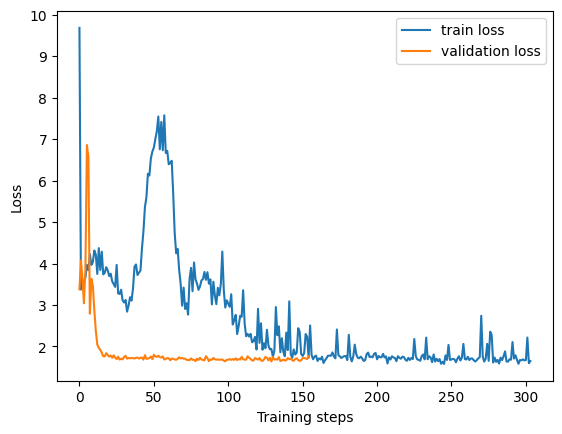

In [26]:
# 5. Plot the fine-tuning loss and MAKE SURE TO SAVE IT AND SUBMIT IT

# plot training losses on x axis
fig = plt.figure()
plt.plot(losses[:304],label='train loss')### YOUR CODE HERE ####)
plt.plot(test_losses, label='validation loss')
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend()
# fig.savefig('loss_commonsenseqa_gpt2.png', dpi=fig.dpi)

In [22]:
# print a few predictions on the eval dataset to see what the model predicts

# construct a list of questions without the ground truth label
# and compare prediction of the model with the ground truth

def construct_test_samples(example):
    """
    Helper for converting input examples which have 
    a separate qquestion, labels, answer options
    into a single string for testing the model.

    Arguments
    ---------
    example: dict
        Sample input from the dataset which contains the 
        question, answer labels (e.g. A, B, C, D),
        the answer options for the question, and which 
        of the answers is correct.
    
    Returns
    -------
    input_text: str, str
        Tuple: Formatted test text which contains the question,
        the forwatted answer options (e.g., 'A. <option 1> B. <option 2>' etc); 
        the ground truth answer label only.
    """

    answer_options_list = list(zip(
        example["choices"]["label"],
        example["choices"]["text"]
    ))
    # join each label and text with . and space
    answer_options = ['. '.join(y) for y in answer_options_list] ### YOUR CODE HERE ####
    # join the list of options with spaces into single string
    answer_options_string = ' '.join(answer_options) ### YOUR CODE HERE ####
    # combine question and answer options
    input_text = example["question"] + " " + answer_options_string
    # create the test input text which should be:
    # the input text, followed by the string "Answer: "
    # we don't need to append the ground truth answer since we are creating test inputs
    # and the answer should be predicted.
    input_text += "\nAnswer: " ### YOUR CODE HERE ####

    return input_text, example["answerKey"]

test_samples = [construct_test_samples(dataset["validation"][i]) for i in range(20)]
test_samples[0]

('A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york\nAnswer: ',
 'A')

## after finetuning

In [23]:
# Test the model 

# set it to evaluation mode
model.eval()

predictions = []
for sample in test_samples:
    input_text = sample[0]
    input_ids = tokenizer(input_text, return_tensors="pt").to(device)
    output = model.generate(
        input_ids.input_ids,
        attention_mask = input_ids.attention_mask,
        max_new_tokens=2,
        do_sample=True,
        temperature=0.4,
    )
    prediction = tokenizer.decode(output[0], skip_special_tokens=True)
    print(prediction, '\n---')
    predictions.append((input_text, prediction, sample[1]))

print("Predictions of trained model ", predictions)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york
Answer: : D 
---
What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other
Answer:  B: 
---
Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary
Answer:  C: 
---
Where are  you likely to find a hamburger? A. fast food restaurant B. pizza C. ground up dead cows D. mouth E. cow carcus
Answer: : D 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


James was looking for a good place to buy farmland.  Where might he look? A. midwest B. countryside C. estate D. farming areas E. illinois
Answer:  B: 
---
What island country is ferret popular? A. own home B. north carolina C. great britain D. hutch E. outdoors
Answer:  A: 
---
In what Spanish speaking North American country can you get a great cup of coffee? A. mildred's coffee shop B. mexico C. diner D. kitchen E. canteen
Answer:  A: 
---
What do animals do when an enemy is approaching? A. feel pleasure B. procreate C. pass water D. listen to each other E. sing
Answer: : C 
---
Reading newspaper one of many ways to practice your what? A. literacy B. knowing how to read C. money D. buying E. money bank
Answer: : B 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What do people typically do while playing guitar? A. cry B. hear sounds C. singing D. arthritis E. making music
Answer: : B 
---
What would vinyl be an odd thing to replace? A. pants B. record albums C. record store D. cheese E. wallpaper
Answer:  B: 
---
If you want harmony, what is something you should try to do with the world? A. take time B. make noise C. make war D. make peace E. make haste
Answer: : C 
---
Where does a heifer's master live? A. farm house B. barnyard C. stockyard D. slaughter house E. eat cake
Answer:  B: 
---
Aside from water and nourishment what does your dog need? A. bone B. charm C. petted D. lots of attention E. walked
Answer: : B 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Janet was watching the film because she liked what? A. erection B. laughter C. being entertained D. fear E. bordem
Answer:  B: 
---
What are you waiting alongside with when you're in a reception area? A. motel B. chair C. hospital D. people E. hotels
Answer:  A: 
---
When drinking booze what can you do to stay busy? A. reach tentative agreement B. stay in bed C. stop bicycle D. examine thing E. suicide
Answer: : B 
---
A fencing thrust with a sharp sword towards a person would result in what? A. injury B. small cuts C. fever D. competition E. puncture wound
Answer: : A 
---
Unlike a spider and his many sight seers, people only have what? A. tongues B. names C. brains D. feelings E. two eyes
Answer:  A: 
---
Where do adults use glue sticks? A. classroom B. desk drawer C. at school D. office E. kitchen drawer
Answer: : E 
---
Predictions of trained model  [('A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. 

## Before finetuning

In [19]:
# Test the model 

# set it to evaluation mode
model.eval()

predictions = []
for sample in test_samples:
    input_text = sample[0]
    input_ids = tokenizer(input_text, return_tensors="pt").to(device)
    output = model.generate(
        input_ids.input_ids,
        attention_mask = input_ids.attention_mask,
        max_new_tokens=2,
        do_sample=True,
        temperature=0.4,
    )
    prediction = tokenizer.decode(output[0], skip_special_tokens=True)
    print(prediction, '\n---')
    predictions.append((input_text, prediction, sample[1]))

print("Predictions of trained model ", predictions)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york
Answer:  I 
---
What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other
Answer:  I 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary
Answer:  I 
---
Where are  you likely to find a hamburger? A. fast food restaurant B. pizza C. ground up dead cows D. mouth E. cow carcus
Answer:  The 
---
James was looking for a good place to buy farmland.  Where might he look? A. midwest B. countryside C. estate D. farming areas E. illinois
Answer:  The 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What island country is ferret popular? A. own home B. north carolina C. great britain D. hutch E. outdoors
Answer:  The 
---
In what Spanish speaking North American country can you get a great cup of coffee? A. mildred's coffee shop B. mexico C. diner D. kitchen E. canteen
Answer:  I 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What do animals do when an enemy is approaching? A. feel pleasure B. procreate C. pass water D. listen to each other E. sing
Answer:  Each 
---
Reading newspaper one of many ways to practice your what? A. literacy B. knowing how to read C. money D. buying E. money bank
Answer:  I 
---
What do people typically do while playing guitar? A. cry B. hear sounds C. singing D. arthritis E. making music
Answer:  I 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What would vinyl be an odd thing to replace? A. pants B. record albums C. record store D. cheese E. wallpaper
Answer:  I 
---
If you want harmony, what is something you should try to do with the world? A. take time B. make noise C. make war D. make peace E. make haste
Answer:  I 
---
Where does a heifer's master live? A. farm house B. barnyard C. stockyard D. slaughter house E. eat cake
Answer: ____________________________________________________________________ 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Aside from water and nourishment what does your dog need? A. bone B. charm C. petted D. lots of attention E. walked
Answer:  It 
---
Janet was watching the film because she liked what? A. erection B. laughter C. being entertained D. fear E. bordem
Answer:  I 
---
What are you waiting alongside with when you're in a reception area? A. motel B. chair C. hospital D. people E. hotels
Answer:  I 
---
When drinking booze what can you do to stay busy? A. reach tentative agreement B. stay in bed C. stop bicycle D. examine thing E. suicide
Answer:  I 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A fencing thrust with a sharp sword towards a person would result in what? A. injury B. small cuts C. fever D. competition E. puncture wound
Answer:  The 
---
Unlike a spider and his many sight seers, people only have what? A. tongues B. names C. brains D. feelings E. two eyes
Answer:  The 
---
Where do adults use glue sticks? A. classroom B. desk drawer C. at school D. office E. kitchen drawer
Answer:  A 
---
Predictions of trained model  [('A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york\nAnswer: ', 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york\nAnswer: \xa0I', 'A'), ('What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other\nAnswer: ', 'What do people aim to do at work? A. com

Questions:
> 1. Provide a brief description of the CommonsenseQA dataset. What kind of task was it developed for, what do the single columns contain?
> 2. What loss function is computed for this training? Provide the name of the function (conceptual, not necessarily the name of a function in the code).
> 3. Given your loss curve, do you think your model will perform well on answering common sense questions? (Note: there is no single right answer; you need to interpret your specific plot)
> 4. Inspect the predictions above. On how many test questions did the model predict the right answer? Compute the accuracy.

## ask polina on friday:
- why the tensors are packed into 3d/4d tensors in the batch, i.e., why did I have to `squeeze` the input tensors to remove the middle redundant dimension? it was not the case in the last sheet.
- by-word tokenization and do we consider <bos> and <eos> tokens for the theoretical problem?
- is this loss computation: `loss = torch.nn.CrossEntropyLoss()(logits[:, -2, :], targets[:, -1]) ### YOUR CODE HERE ####` correct or what they expected us to do?
- since GPT2 is a decoder only model, it is not actually suitable directly for classification models! why did they give it then?
- What is the difference between this model and AutoModelForSequenceClassification models? Do they have different architectures or one extra head?
- how to freeze during finetuning?